computer vision is a practice of writing algos. which can discover patterns in visual data such as self dring car recognizes stuffs

# Get the data: 
the image we're working with are from the food 101 datasets(101 different kind of foods) fro keggal. however we've modified it to only use two classes (pizza and steak)

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
    
# (!wget) this code gets the file from the link and downloads it into the jupyter notebook

# unzip the downloaded file:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-12-03 19:33:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.128, 74.125.20.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   217MB/s    in 0.5s    

2022-12-03 19:33:14 (217 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
## inspect the data(become one with it)

!ls pizza_steak #!ls stands for list the file in pizza steak data set

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [60]:
import os # we're going to use the function from os

#walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in 'pizza_steak'.
there are 2 directories and 0 images in 'pizza_steak/train'.
there are 0 directories and 750 images in 'pizza_steak/train/pizza'.
there are 0 directories and 750 images in 'pizza_steak/train/steak'.
there are 2 directories and 0 images in 'pizza_steak/test'.
there are 0 directories and 250 images in 'pizza_steak/test/pizza'.
there are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec  3 19:15 .
drwxr-xr-x 1 root root 4096 Dec  3 19:15 ..
drwxr-xr-x 4 root root 4096 Dec  3 19:15 test
drwxr-xr-x 4 root root 4096 Dec  3 19:15 train


In [ ]:
# another way to find out how many images in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")) #this basiclly mean find no. of images in pizza_steak diectory win train steak section
num_steak_images_train

750

to visualize our images, first let's get the classes names programmitically

In [5]:
# get the class names programitically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_name = np.array(sorted([item.name for item in data_dir.glob("*")])) #created a list of path name from sub directory
print(class_name)

['pizza' 'steak']


In [6]:
# let's visualizee our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random 
def view_random_image(target_dir, target_class):
  # setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #get the random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read in the images and plot it using matplotlib
  img = mpimg .imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"image_shape:{img.shape}") # show the shape of the image

  return img

['3337370.jpg']
image_shape:(512, 512, 3)


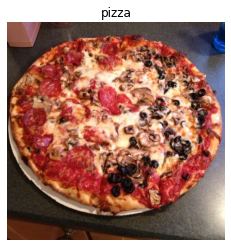

In [ ]:
# view the random image from the training data set
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class="pizza")

In [ ]:
img # we have returned image as img at the end of the fucntion we've created but img is just an array

array([[[140,  83,  66],
        [145,  88,  71],
        [148,  91,  74],
        ...,
        [ 23,  60, 105],
        [ 24,  57, 102],
        [ 26,  57, 101]],

       [[141,  84,  67],
        [145,  88,  71],
        [146,  89,  72],
        ...,
        [ 24,  60, 108],
        [ 31,  63, 110],
        [ 34,  65, 111]],

       [[143,  86,  69],
        [145,  88,  71],
        [145,  88,  71],
        ...,
        [ 45,  81, 133],
        [ 48,  80, 129],
        [ 43,  74, 121]],

       ...,

       [[ 23,   3,   2],
        [ 25,   4,   3],
        [ 31,   7,   3],
        ...,
        [114, 112,  99],
        [110, 108,  95],
        [113, 114, 100]],

       [[ 31,  15,  16],
        [ 28,  10,  10],
        [ 26,   6,   5],
        ...,
        [103, 104,  90],
        [105, 106,  92],
        [103, 104,  90]],

       [[ 44,  29,  32],
        [ 36,  20,  21],
        [ 28,  10,   8],
        ...,
        [103, 104,  90],
        [112, 113,  99],
        [110, 111,  97]]

In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(img) # here we're converting our img array into an tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[140,  83,  66],
        [145,  88,  71],
        [148,  91,  74],
        ...,
        [ 23,  60, 105],
        [ 24,  57, 102],
        [ 26,  57, 101]],

       [[141,  84,  67],
        [145,  88,  71],
        [146,  89,  72],
        ...,
        [ 24,  60, 108],
        [ 31,  63, 110],
        [ 34,  65, 111]],

       [[143,  86,  69],
        [145,  88,  71],
        [145,  88,  71],
        ...,
        [ 45,  81, 133],
        [ 48,  80, 129],
        [ 43,  74, 121]],

       ...,

       [[ 23,   3,   2],
        [ 25,   4,   3],
        [ 31,   7,   3],
        ...,
        [114, 112,  99],
        [110, 108,  95],
        [113, 114, 100]],

       [[ 31,  15,  16],
        [ 28,  10,  10],
        [ 26,   6,   5],
        ...,
        [103, 104,  90],
        [105, 106,  92],
        [103, 104,  90]],

       [[ 44,  29,  32],
        [ 36,  20,  21],
        [ 28,  10,   8],
        ...,
        [103, 104,  9

In [ ]:
#view the image shape
img.shape #it returns width height and colour channels(red, blue,green)

(512, 512, 3)

In [ ]:
# get all the pixal values between 0-1(normalize)
img/255 #this arthematic operation actually converts all the values in our previous array and now tensor between 0-1 but the problem is that it does this only for one image we have to d that for all the images

array([[[0.54901961, 0.3254902 , 0.25882353],
        [0.56862745, 0.34509804, 0.27843137],
        [0.58039216, 0.35686275, 0.29019608],
        ...,
        [0.09019608, 0.23529412, 0.41176471],
        [0.09411765, 0.22352941, 0.4       ],
        [0.10196078, 0.22352941, 0.39607843]],

       [[0.55294118, 0.32941176, 0.2627451 ],
        [0.56862745, 0.34509804, 0.27843137],
        [0.57254902, 0.34901961, 0.28235294],
        ...,
        [0.09411765, 0.23529412, 0.42352941],
        [0.12156863, 0.24705882, 0.43137255],
        [0.13333333, 0.25490196, 0.43529412]],

       [[0.56078431, 0.3372549 , 0.27058824],
        [0.56862745, 0.34509804, 0.27843137],
        [0.56862745, 0.34509804, 0.27843137],
        ...,
        [0.17647059, 0.31764706, 0.52156863],
        [0.18823529, 0.31372549, 0.50588235],
        [0.16862745, 0.29019608, 0.4745098 ]],

       ...,

       [[0.09019608, 0.01176471, 0.00784314],
        [0.09803922, 0.01568627, 0.01176471],
        [0.12156863, 0

## an end-to-end example
let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* pre-process our images
* Build a CNN to find patterns in our images
* compile our CNN
* fit out CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set the seed
tf.random.set_seed(42)

#Preprocessing data (get all of the pixal values between 0 & 1 its also called scalling or normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data= valid_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

#build a CNN model(same as tiny VGG on the CNN explainer website)
model_1=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                      
])

#compile our CNN
model_1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#Fit our model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 28s 306ms/step - loss: 0.5980 - accuracy: 0.6833 - val_loss: 0.4754 - val_accuracy: 0.7953
Epoch 2/5
47/47 [==============================] - 14s 299ms/step - loss: 0.4517 - accuracy: 0.7993 - val_loss: 0.5169 - val_accuracy: 0.7787
Epoch 3/5
47/47 [==============================] - 14s 297ms/step - loss: 0.4343 - accuracy: 0.8073 - val_loss: 0.4352 - val_accuracy: 0.8067
Epoch 4/5
47/47 [==============================] - 15s 317ms/step - loss: 0.3885 - accuracy: 0.8320 - val_loss: 0.3383 - val_accuracy: 0.8607
Epoch 5/5
47/47 [==============================] - 14s 296ms/step - loss: 0.3468 - accuracy: 0.8600 - val_loss: 0.2966 - val_accuracy: 0.8780


# using the same model as before
replicating the model we've made in previous section

In [ ]:
#set random seed
tf.random.set_seed(42)

#creating a model
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the mode
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 286ms/step - loss: 0.7801 - accuracy: 0.5127 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 282ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 13s 276ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 13s 278ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 285ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# get the summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


# despite having 20x more params than our model_1 our model 2 was just sit

In [ ]:
#set seed
tf.random.set_seed(42)

#create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 14s 288ms/step - loss: 4.3875 - accuracy: 0.6613 - val_loss: 1.2066 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 13s 279ms/step - loss: 1.1414 - accuracy: 0.6980 - val_loss: 1.7970 - val_accuracy: 0.6127
Epoch 3/5
47/47 [==============================] - 13s 281ms/step - loss: 1.1219 - accuracy: 0.7173 - val_loss: 0.4193 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 13s 278ms/step - loss: 0.6028 - accuracy: 0.7553 - val_loss: 0.5808 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 14s 296ms/step - loss: 0.5984 - accuracy: 0.7587 - val_loss: 0.4269 - val_accuracy: 0.8167


In [ ]:
# get the summary of our model 
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,063,101
Trainable params: 15,063,101
Non-trainable params: 0
_________________________________________________________________


this model has performed on par to that of a CNN model only the difference is that no of parameters this one has is 500 time more than that of a model_1

CNN can do better without involving more number of parameters

## binary classification: let's break it down
1. visualise the data
2. preprocess the data
3. created a model
4. fir the model
5. evaluate the model
6. adjust different params and improve the model

['2268692.jpg']
image_shape:(512, 512, 3)
['384215.jpg']
image_shape:(382, 512, 3)


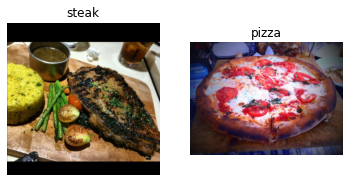

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

 ## preparing our data
 preprocess our data(prepare it for our model)

In [ ]:
# define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"


our next stepp is to turn our daata into **batches**
a batch is a small subset of data. Rather than look at all images at ones, a model might only look at a time.
1. if i use a lot of data it might not fit properly into the momory of your processor(GPU)
2. trying to learn in alot of images in one hit could result in the model not being able to learn very well.
3. we can use any number of data but generally we use 32

In [ ]:
!nvidia-smi

Sat Dec  3 19:19:26 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0    30W /  70W |   2422MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # this basically means is that when you load our images divide all of the pixal values by 255
test_datagen =  ImageDataGenerator(rescale=1/255.)

In [ ]:
# Loading in our image data from directoies and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, #target dir of images
                                               target_size=(224, 224), #target size of images(height, width)
                                               class_mode="binary", #one of categorical, binary, sparse basically type of data i'm working with
                                               batch_size=32) #it's the size of minibathes to work with
test_data = train_datagen.flow_from_directory(directory=test_dir,                                               
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of training data batch
images, labels = train_data.next() # next is basically saying get "next" batches of image/labels in train data
len(images), len(labels)

(32, 32)

In [ ]:
# how many batches are there
len(train_data)

47

In [ ]:
# get the first two images
images[:2], images[0].shape

(array([[[[0.3647059 , 0.10980393, 0.02352941],
          [0.37254903, 0.12941177, 0.03921569],
          [0.37647063, 0.14117648, 0.04705883],
          ...,
          [0.7803922 , 0.58431375, 0.3921569 ],
          [0.73333335, 0.54509807, 0.3529412 ],
          [0.75294125, 0.5529412 , 0.3372549 ]],
 
         [[0.3647059 , 0.12156864, 0.03921569],
          [0.37254903, 0.12941177, 0.04705883],
          [0.35686275, 0.11764707, 0.03529412],
          ...,
          [0.7490196 , 0.56078434, 0.37254903],
          [0.7490196 , 0.5529412 , 0.3529412 ],
          [0.7725491 , 0.5568628 , 0.33333334]],
 
         [[0.37254903, 0.1254902 , 0.05490196],
          [0.3647059 , 0.11764707, 0.04705883],
          [0.37254903, 0.13333334, 0.05882353],
          ...,
          [0.7568628 , 0.57254905, 0.3921569 ],
          [0.7372549 , 0.52156866, 0.30980393],
          [0.78823537, 0.5372549 , 0.28627452]],
 
         ...,
 
         [[0.6156863 , 0.5882353 , 0.5254902 ],
          [0.60392

[link text](https:// [link text](https://))**we can see the pixal value is scaled**, more over it has been reshabed to (224, 224, 3)

In [ ]:
images[7], images[7].shape

(array([[[0.98823535, 1.        , 0.9725491 ],
         [0.98823535, 1.        , 0.9725491 ],
         [0.98823535, 1.        , 0.9725491 ],
         ...,
         [0.98823535, 0.9490197 , 0.91372555],
         [0.93725497, 0.90196085, 0.882353  ],
         [1.        , 0.9960785 , 1.        ]],
 
        [[0.98823535, 1.        , 0.9725491 ],
         [0.98823535, 1.        , 0.9725491 ],
         [0.98823535, 1.        , 0.9725491 ],
         ...,
         [0.7725491 , 0.62352943, 0.53333336],
         [0.95294124, 0.8196079 , 0.72156864],
         [0.7019608 , 0.5882353 , 0.5176471 ]],
 
        [[0.98823535, 1.        , 0.9725491 ],
         [0.98823535, 1.        , 0.9725491 ],
         [0.98823535, 1.        , 0.9725491 ],
         ...,
         [0.7254902 , 0.4784314 , 0.34117648],
         [0.5686275 , 0.33333334, 0.18823531],
         [0.69803923, 0.48627454, 0.3372549 ]],
 
        ...,
 
        [[0.427451  , 0.40000004, 0.47058827],
         [0.41176474, 0.38431376, 0.45490

In [ ]:
# view the first batch of labels
labels

array([1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1.],
      dtype=float32)

**either 1 represnts pizza and zero represent steak or it can be inversed but that's not really oour concern at this point**



# creating our model(CNN)
a base line is relatively simple model for existing result that you setup when beginning a machine learning experiment and then as we keep experimenting we try to improve from baseline
* **In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start something simple and see if it works with our data and than introduce complexity if required. (eg. look at which current model is performing best in the field of your problem)**

In [ ]:
# make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this will be our baseline, a layer convulutional neural network)
model_4= Sequential([
    Conv2D(filters=10, # FILTERS is the number of sliding windows going across an an input (heigher=more complex model) 
           kernel_size=3, #it's the size of the sliding windows going across an input
           strides=1, #it's the size of the step sliding window takes across an input
           padding="valid", # IF "SAME"  output shape is same as input shape, if "valid", output gets compressedshape get compressed
           activation="relu",
           input_shape=(224,224,3)), # input layer(specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer( working with binary classification so only 1 output neuron)
])

# Studying the model we've created above
1. FILTERS:- it decides how many filters should pass over an input tensor (e.g. sliding windows over an image), **TYPICAL VALUES** :- (10, 32, 64, 128(heigher values lead to more complex models))
2. KERNAL SIZE(also called filter size):- determines the shape of the filter (sliding windows) over the input. **TYPICAL VALUES**:- 3,5,7(lower values learn smaller features, higher values learn larger features)
3. PADDING:- Pads the target tensor with zeros (if "same") to preserve input shape. Or leaves in the target tensor as is (if "valid"), lowering output shPE **TYPICAL VALUES**:- **"SAME" OR "VALID"
4. STRIDES:- The number of steps a filter takes across an image at a time (e.g. if S T R I D E=2, a filter moves across image 1 pixal at a time. **TYPICAL VALUES**:- 1(DEFAULT), 2)

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### fit the model

In [ ]:
# check lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
history_4=model_4.fit(train_data, # this is the combination of labels and sample data
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 0.8432 - accuracy: 0.6607 - val_loss: 0.5539 - val_accuracy: 0.7060
Epoch 2/5
47/47 [==============================] - 10s 203ms/step - loss: 0.4673 - accuracy: 0.7880 - val_loss: 0.4221 - val_accuracy: 0.8120
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3755 - accuracy: 0.8453 - val_loss: 0.4325 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.2298 - accuracy: 0.9247 - val_loss: 0.4202 - val_accuracy: 0.8220
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.1139 - accuracy: 0.9700 - val_loss: 0.4829 - val_accuracy: 0.8000


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 2s 148ms/step - loss: 0.2976 - accuracy: 0.8760


[0.2975563108921051, 0.8759999871253967]

# Evaluate the model

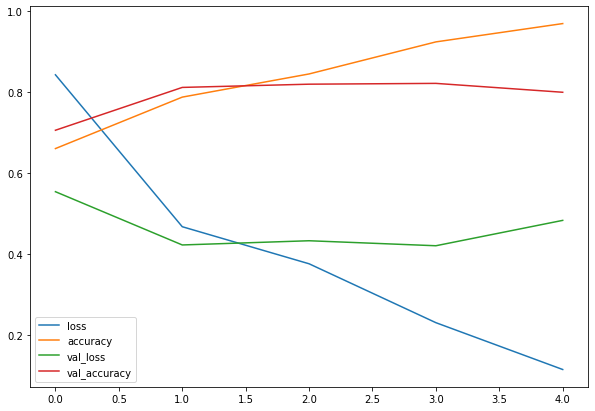

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

>When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

Hmm, judging by our loss curves, it looks like our model is overfitting the training dataset.

🔑 Note: When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

To further inspect our model's training performance, let's separate the accuracy and loss curves.

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

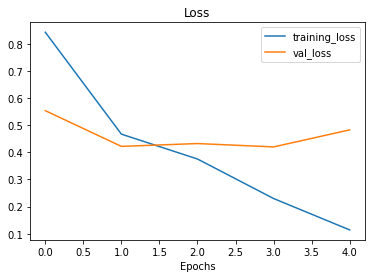

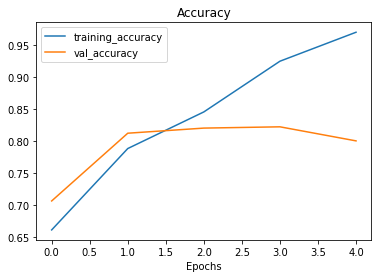

In [ ]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means your model is probably overfitting.

In [ ]:
# Check out our model's architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Adjust the model parameters
Fitting a machine learning model comes in 3 steps: 0. Create a basline.

1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.
So far we've gone through steps 0 and 1.

And there are even a few more things we could try to further overfit our model:

**Increase the number of convolutional layers.**
**Increase the number of convolutional filters.**
**Add another dense layer to the output of our flattened layer.**
But what we'll do instead is focus on getting our model's training curves to better align with eachother, in other words, we'll take on step 2.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use to us if we wanted to use it in the real world.

Say we were building a pizza vs. steak food classifier app, and our model performs very well on our training data but when users tried it out, they didn't get very good results on their own food images, is that a good experience?

Not really...

So for the next few models we build, we're going to adjust a number of parameters and inspect the training curves along the way.

Namely, we'll build 2 more models:

* **A ConvNet with max pooling**
* **A ConvNet with max pooling and data augmentation**

In [ ]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])



If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 203ms/step - loss: 0.6210 - accuracy: 0.6560 - val_loss: 0.4755 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 9s 197ms/step - loss: 0.4659 - accuracy: 0.7900 - val_loss: 0.4188 - val_accuracy: 0.7880
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4331 - accuracy: 0.8053 - val_loss: 0.3488 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4068 - accuracy: 0.8293 - val_loss: 0.3436 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.4020 - accuracy: 0.8187 - val_loss: 0.3954 - val_accuracy: 0.8180


Okay, it looks like our model with max pooling (model_5) is performing worse on the training set but better on the validation set.

Before we checkout its training curves, let's check out its architecture.

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

Do you notice what's going on here with the output shape in each MaxPooling2D layer?

It gets halved each time. This is effectively the MaxPooling2D layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the pool_size parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in model_5 and 477,431 in model_4).

Time to check out the loss curves.

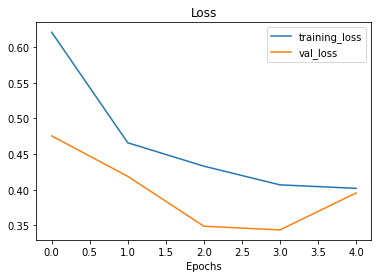

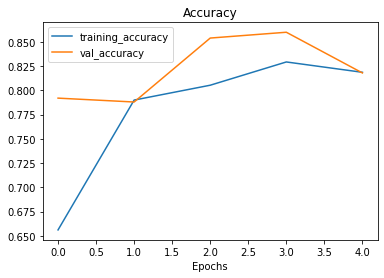

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

Nice! We can see the training curves get a lot closer to eachother. However, our the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to dig into our bag of tricks and try another method of overfitting prevention, data augmentation.

First, we'll see how it's done with code then we'll discuss what it's doing.

To implement data augmentation, we'll have to reinstantiate our ***ImageDataGenerator*** instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> **Question**: What's data augmentation?

**Data augmentation** is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

If we're building a pizza vs. steak application, not all of the images our users take might be in similar setups to our training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

>🔑 Note: Data augmentation is usally only performed on the training data. Using the ImageDataGenerator built-in data augmentation parameters our images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


Better than talk about data augmentation, how about we see it?

(remember our motto? visualize, visualize, visualize...)

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't

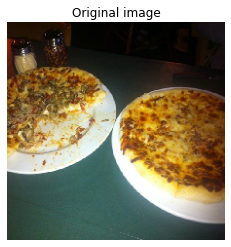

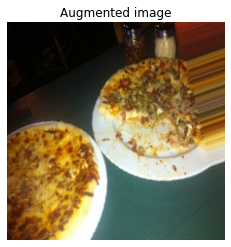

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, you can start to see some of the example transformations on the training images.

Notice how some of the augmented images look like slightly warped versions of the original image. This means our model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.
> **🤔 Question**: Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the ImageDataGenerator class and think about how a model in your use case might benefit from some data augmentation.

Now we've got augmented data, let's try and refit a model on it and see how it affects training.

We'll use the same model as model_5.

We'll use the same model as model_5.

In [ ]:

# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 23s 488ms/step - loss: 0.6931 - accuracy: 0.4953 - val_loss: 0.6741 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.7065 - accuracy: 0.4553 - val_loss: 0.6775 - val_accuracy: 0.6800
Epoch 3/5
47/47 [==============================] - 23s 484ms/step - loss: 0.6884 - accuracy: 0.5300 - val_loss: 0.6639 - val_accuracy: 0.5340
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6750 - accuracy: 0.5747 - val_loss: 0.6423 - val_accuracy: 0.6420
Epoch 5/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6799 - accuracy: 0.5987 - val_loss: 0.6433 - val_accuracy: 0.5640
